In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import MC_digital, digital_numpys, black_scholes
from scipy.stats import norm

# Apply the default theme
sns.set_theme()


In [56]:

stock_price_T0 = 100
T = 1
r = 0.06
strike_price = 99
#volatility
sigma = 0.2
#steps of the stock
#steps = 10

#different paths to see when it converges
# n_paths = np.logspace(3,5,3).astype(int)
# n_paths = np.linspace(1000,6000,5).astype(int)
n_paths = np.array([10**i for i in range(4,9)])

n_paths

# ST,RV,multiple_P,pays,likelihood_delta,pathwise_arr = digital_numpys.mc_pricer(stock_price_T0, strike_price, sigma, T, r, paths = 10000)


epsilons = np.arange(0,0.11,0.01)
# epsilons = np.arange(0,2.2,0.2)

In [93]:
#same seeds for bumped and unbumped
np.random.seed(42)


epsilons = np.arange(0,0.1,0.01)
# epsilons = np.arange(0,2,0.5)
price_P_MCs = []

delta_likelihoods_mean = []

pathwise_mean = []
deltasMC = np.array([])


# pathwise_arr = np.exp(-r * T)* norm.pdf(payoffs[5])* np.exp((r - 0.5 * (sigma**2))*T + sigma*np.sqrt(T)*norm.pdf(0,1) )

price_P_MCs = []
for paths in n_paths:
    print(paths)
    ST,RV,multiple_P,pays,likelihood_delta,pathwise_arr = digital_numpys.mc_pricer(stock_price_T0, strike_price, sigma, T, r, paths)
    #Calculate for epsilon = 0

    
    # price_P_MCs.append(multiple_P)               # price of option

    #Likelihood delta mean for each paths
    delta_likelihoods_mean.append(likelihood_delta)
    #Pathwise calculation
    pathwise_mean.append(pathwise_arr)


    # Continue for the rest of epsilons

    for epsilon in epsilons:
        print('Stock price:', stock_price_T0 + epsilon)
           
        multiple_P= digital_numpys.mc_pricer(stock_price_T0+epsilon, strike_price, sigma, T, r, paths)[2]
 
        price_P_MCs.append(multiple_P)               # price of option


# price_P_MCs=np.array(price_P_MCs)
keep_price_P_MCs = price_P_MCs
price_P_MCs = np.reshape(price_P_MCs,(len(n_paths), len(epsilons)))




10000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock price: 100.08
Stock price: 100.09
100000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock price: 100.08
Stock price: 100.09
1000000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock price: 100.08
Stock price: 100.09
10000000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock price: 100.08
Stock price: 100.09
100000000
Stock price: 100.0
Stock price: 100.01
Stock price: 100.02
Stock price: 100.03
Stock price: 100.04
Stock price: 100.05
Stock price: 100.06
Stock price: 100.07
Stock

array([-6.77441543e-01, -3.90203361e-01,  4.14387173e-02, -1.68888695e-01,
       -1.06722535e-02, -1.45344582e-01, -2.08971256e-02, -7.00034191e-02,
        2.78354519e-02,  3.48140034e-01,  4.86589121e-02,  6.24714586e-02,
        1.36478455e-01,  5.14842057e-02,  3.98691098e-02,  3.33216040e-02,
        2.91172980e-02,  4.24851224e-02, -3.52523078e-02, -7.70569523e-03,
       -2.77181916e-02, -2.99687256e-03, -6.41547782e-03,  4.17623397e-03,
       -8.95016979e-03, -6.06937935e-03,  4.30180257e-03,  3.01155684e-02,
        6.90578151e-03, -1.30169640e-03,  2.64429699e-03, -7.55189789e-05,
        6.59029039e-03,  3.66812958e-03,  1.52124279e-03,  3.92823597e-03,
       -1.46462167e-03,  1.17655697e-03, -9.24048824e-04,  8.84139081e-04,
        8.46656852e-04, -6.89266271e-05, -1.43998714e-04,  6.78010369e-04,
        2.97210495e-04])

In [54]:



deltasMC = np.array([])
for i in range(len(n_paths)):
    for j in range(len(epsilons)-1):
        delta_MC = (price_P_MCs[i][j+1]-price_P_MCs[i,0])/epsilons[j+1]
  
        deltasMC= np.append(deltasMC,delta_MC)
   


deltasMC - delta_analytical



array([-6.77441543e-01, -3.90203361e-01,  4.14387173e-02, -1.68888695e-01,
       -1.06722535e-02, -1.45344582e-01, -2.08971256e-02, -7.00034191e-02,
        2.78354519e-02,  3.48140034e-01,  4.86589121e-02,  6.24714586e-02,
        1.36478455e-01,  5.14842057e-02,  3.98691098e-02,  3.33216040e-02,
        2.91172980e-02,  4.24851224e-02, -3.52523078e-02, -7.70569523e-03,
       -2.77181916e-02, -2.99687256e-03, -6.41547782e-03,  4.17623397e-03,
       -8.95016979e-03, -6.06937935e-03,  4.30180257e-03,  3.01155684e-02,
        6.90578151e-03, -1.30169640e-03,  2.64429699e-03, -7.55189789e-05,
        6.59029039e-03,  3.66812958e-03,  1.52124279e-03,  3.92823597e-03])

In [72]:
unbumped = [price_P_MCs[0][0],price_P_MCs[1][0],price_P_MCs[2][0],price_P_MCs[3][0],price_P_MCs[4][0] ]

unbumped - call_analytical

array([ 4.14033690e-03, -3.31843821e-03,  3.32782887e-04, -2.39339067e-04,
       -3.46472234e-06])

In [22]:
eps1 = [price_P_MCs[0][1],price_P_MCs[1][1],price_P_MCs[2][1],price_P_MCs[3][1]]
for i in range(1,len(epsilons)):
    epsi = [price_P_MCs[0][1],price_P_MCs[1][1],price_P_MCs[2][1],price_P_MCs[3][1]]
price_P_MCs

array([[0.56807237, 0.56148001, 0.56063243, 0.56986172, 0.56204507,
        0.56844907, 0.56044407, 0.56788401, 0.5639286 , 0.57221613],
       [0.56061359, 0.56427706, 0.5619509 , 0.56303393, 0.56680098,
        0.56409812, 0.56409812, 0.56422055, 0.56439948, 0.56607583],
       [0.56426481, 0.56409435, 0.56447483, 0.56397946, 0.56487319,
        0.56485436, 0.56560777, 0.56491275, 0.56523577, 0.56629055],
       [0.56369269, 0.56417591, 0.56419493, 0.56419983, 0.56452672,
        0.56459923, 0.56518049, 0.56522391, 0.5652709 , 0.56568481]])

In [32]:
rel_price_P_MCs = 100*(price_P_MCs - call_analytical)/call_analytical
rel_price_P_MCs
price_df =pd.DataFrame(rel_price_P_MCs).T 
print(price_df.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.734191 & -0.588446 &  0.059011 & -0.042441 \\
1 & -0.434807 &  0.061182 &  0.028784 &  0.043246 \\
2 & -0.585106 & -0.351307 &  0.096252 &  0.046620 \\
3 &  1.051490 & -0.159257 &  0.008410 &  0.047488 \\
4 & -0.334607 &  0.508741 &  0.166893 &  0.105454 \\
5 &  0.800991 &  0.029452 &  0.163553 &  0.118313 \\
6 & -0.618506 &  0.029452 &  0.297153 &  0.221385 \\
7 &  0.700791 &  0.051162 &  0.173907 &  0.229084 \\
8 & -0.000608 &  0.082892 &  0.231188 &  0.237417 \\
9 &  1.468989 &  0.380152 &  0.418227 &  0.310813 \\
\bottomrule
\end{tabular}



In [91]:

#Find errors for price: 

rel_err_dig= 100*abs(price_P_MCs-call_analytical)/call_analytical
abs_err_dig = abs(price_P_MCs-call_analytical)

rel_err_dig = np.array(rel_err_dig)
rel_err_dig = np.reshape(rel_err_dig,(len(n_paths), len(epsilons)))
# rel_err_likelihood= 100*abs(delta_likelihoods_mean -delta_analytical)/(delta_analytical )
# rel_err_pathwise= 100*abs(pathwise_mean -delta_analytical)/(delta_analytical)

means_MC =100*np.array([np.mean(rel_err_dig[0][1:]), np.mean(rel_err_dig[1][1:]), np.mean(rel_err_dig[2][1:]), np.mean(rel_err_dig[3][1:]),np.mean(rel_err_dig[4][1:])])

# # df = pd.DataFrame(frame)
# df = pd.DataFrame({'Method': ['MC','L','P'],
#                     '1000': [means_MC[0],rel_err_likelihood[0],rel_err_pathwise[0]],
#                     '10000': [means_MC[1],rel_err_likelihood[1],rel_err_pathwise[1]],
#                     '100000': [means_MC[2],rel_err_likelihood[2],rel_err_pathwise[2]],
#                    '1000000': [means_MC[3],rel_err_likelihood[3],rel_err_pathwise[3]],
#                    '10000000': [means_MC[4],rel_err_likelihood[4],rel_err_pathwise[4]]} )

# df = df.set_index('Method')
# df

df = pd.DataFrame({
                    '1000': rel_err_dig[0],
                    '10000': rel_err_dig[1],
                    '100000': rel_err_dig[2],
                   '1000000': rel_err_dig[3],
                   '10000000': rel_err_dig[4]})

df

,1000,10000,100000,1000000,10000000
0,0.734191,0.157587,0.077047,0.023887,0.005509
1,1.018090,1.250220,1.648681,1.603173,1.601569
2,2.370787,3.210796,3.196768,3.224105,3.182665
3,5.510381,4.393153,4.686739,4.715162,4.762196


In [71]:
print(df.to_latex(index=True))




\begin{tabular}{lrrrrr}
\toprule
{} &      1000 &     10000 &    100000 &   1000000 &  10000000 \\
\midrule
0 &  0.734191 &  0.588446 &  0.059011 &  0.042441 &  0.000614 \\
1 &  0.434807 &  0.061182 &  0.028784 &  0.043246 &  0.029073 \\
2 &  0.585106 &  0.351307 &  0.096252 &  0.046620 &  0.068128 \\
3 &  1.051490 &  0.159257 &  0.008410 &  0.047488 &  0.091324 \\
4 &  0.334607 &  0.508741 &  0.166893 &  0.105454 &  0.134796 \\
5 &  0.800991 &  0.029452 &  0.163553 &  0.118313 &  0.168316 \\
6 &  0.618506 &  0.029452 &  0.297153 &  0.221385 &  0.192360 \\
7 &  0.700791 &  0.051162 &  0.173907 &  0.229084 &  0.223591 \\
8 &  0.000608 &  0.082892 &  0.231188 &  0.237417 &  0.267281 \\
9 &  1.468989 &  0.380152 &  0.418227 &  0.310813 &  0.294691 \\
\bottomrule
\end{tabular}



True

In [65]:
price_P_MCs-call_analytical

array([[ 4.14033690e-03, -2.45201484e-03, -3.29960292e-03,
         5.92968951e-03, -1.88695612e-03,  4.51704271e-03,
        -3.48795583e-03,  3.95198399e-03, -3.42705176e-06,
         8.28410084e-03],
       [-3.31843821e-03,  3.45025826e-04, -1.98113257e-03,
        -8.98103359e-04,  2.86895478e-03,  1.66090564e-04,
         1.66090564e-04,  2.88519954e-04,  4.67455215e-04,
         2.14379608e-03],
       [ 3.32782887e-04,  1.62323506e-04,  5.42796378e-04,
         4.74282331e-05,  9.41162775e-04,  9.22327485e-04,
         1.67573911e-03,  9.80716886e-04,  1.30374212e-03,
         2.35851840e-03],
       [-2.39339067e-04,  2.43880315e-04,  2.62903958e-04,
         2.67801134e-04,  5.94687604e-04,  6.67203473e-04,
         1.24846054e-03,  1.29187589e-03,  1.33886994e-03,
         1.75277545e-03],
       [-3.46472234e-06,  1.63952759e-04,  3.84193813e-04,
         5.15004906e-04,  7.60155632e-04,  9.49186609e-04,
         1.08478187e-03,  1.26090125e-03,  1.50728569e-03,
         1.

Text(0, 0.5, 'Price of digital call option')

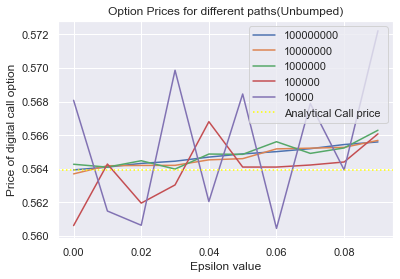

In [94]:

# fig.suptitle("'Relative error of MC as % analytical delta and delta for increasing bumps')")
plt.plot(epsilons,price_P_MCs[4],label='100000000')
plt.plot(epsilons,price_P_MCs[3],label='10000000')
plt.plot(epsilons,price_P_MCs[2],label='1000000')
plt.plot(epsilons,price_P_MCs[1],label='100000')
plt.plot(epsilons,price_P_MCs[0],label='10000')
# plt.axhline(unbumped[0], ls='dashdot', color = 'red', label = '10000 paths ')
# plt.axhline(unbumped[1], ls='dashdot', color = 'green', label = '100000 paths ')
# plt.axhline(unbumped[2], ls='dashdot', color = 'orange', label = '1000000 paths ')
# plt.axhline(unbumped[3], ls='dashdot', color = 'blue', label = '10000000 paths ')
# plt.plot([4,5,6,7,8], unbumped, label = 'Monte Carlo simulation')
plt.axhline(call_analytical, ls=':', color = 'yellow', label = 'Analytical Call price ')

plt.title('Option Prices for different paths(Unbumped)')
# axes[1].plot(epsilons,price_P_MCs[3],label='10000000')
# axes[1].plot(epsilons,price_P_MCs[2],label='1000000')
# axes[1].plot(epsilons,price_P_MCs[1],label='100000')
# axes[1].plot(epsilons,price_P_MCs[0],label='10000')
# axes[1].axhline(delta_analytical, ls='dashdot', color = 'yellow', label = 'Analytical delta ')
# axes[1].set_title('Delta values')
plt.legend()
plt.xlabel('Epsilon value')
plt.ylabel('Price of digital call option')
# axes[1].legend()

In [15]:
print(price_P_MCs )

print(delta_likelihoods_mean, pathwise_mean )

[0.5716510718856389, 0.6017875369603348, 0.5678840137513019, 0.560349897482628, 0.5678840137513019, 0.5631751910833807, 0.5518740166803697, 0.5697675428184703, 0.5876610689565712, 0.5773016590871445, 0.5680723666580189, 0.5635518968968143, 0.5627043088165886, 0.5744763654863917, 0.5683548960180941, 0.577866717807295, 0.5695791899117536, 0.5798444233278218, 0.5765482474602771, 0.5865309515162701, 0.5645690025930853, 0.5624123618111774, 0.5679499372686528, 0.5669799197990611, 0.5699276427891797, 0.574815400718482, 0.5744292772597125, 0.5755782299906852, 0.5770473826630766, 0.5785259529808039, 0.5637214145128598, 0.5662519358146004, 0.5673679267868977, 0.5692392129151295, 0.5708618732064952, 0.5734545509674529, 0.5747155736779223, 0.5770756355990839, 0.5783046383154117, 0.5797690821651351, 0.5641343782608356, 0.5656073921678149, 0.5675659798683099, 0.5693915904166641, 0.5708604605596953, 0.5728683025452963, 0.5745277858299254, 0.5765954298634096, 0.5785095662779189, 0.5799246616660831]
[0

In [228]:
# print("monte carlo deltas: ")
# print(deltasMC)
# print("Likelihood method deltas") 
# print(delta_likelihoods)
# print("Payoffs digital: ")
# print(payoffs)
# print("Pathwise, S_t - K : ")
# print(pathwise_deltas)
print(delta_likelihoods_mean)
print(pathwise_mean)

[0.018180540120311558, 0.018162029536110562, 0.01820450396700365, 0.01821978686328436]
[0.01841122698406748, 0.0185965337017471, 0.01824034322330237, 0.01818563336958913]


### Analytical solution

In [53]:

np.random.seed(42)
def analyticalDigital(stock_price_T0,strike_price,T,r,vol):
    x = (np.log(strike_price/stock_price_T0) -(r-0.5*vol**2)*T)/(vol*np.sqrt(T))
    call = np.exp(-r*T)*norm.cdf(-x)
    put = np.exp(-r*T)*norm.cdf(x)
    delta = (np.exp(-r*T)* norm.pdf(x, 0.0, 1.0))/(vol*stock_price_T0*np.sqrt(T))
    return call, put,delta

price_P_analytical = analyticalDigital(stock_price_T0,strike_price,T,r,sigma)

delta_analytical = price_P_analytical[2]
call_analytical = price_P_analytical[0]
print(price_P_analytical)


(0.5639320297620052, 0.37783250382224354, 0.018206369779490496)


#### Errors between MC and analytical

In [101]:

#Find errors

rel_err_dig= abs(deltasMC-delta_analytical)/delta_analytical
abs_err_dig = abs(deltasMC-delta_analytical)

rel_err_dig = np.array(rel_err_dig)
rel_err_dig = np.reshape(rel_err_dig,(len(n_paths), len(epsilons)-1))
abs_err_dig = np.array(abs_err_dig)
abs_err_dig = np.reshape(abs_err_dig,(len(n_paths), len(epsilons)-1))

means_MC =100*np.array([np.mean(rel_err_dig[0]), np.mean(rel_err_dig[1]), np.mean(rel_err_dig[2]), np.mean(rel_err_dig[3]), np.mean(rel_err_dig[4])])

rel_err_likelihood= 100*abs(delta_likelihoods_mean -delta_analytical)/(delta_analytical )

rel_err_pathwise= 100*abs(pathwise_mean -delta_analytical)/(delta_analytical)

#For absolute error
# means_MC =np.array([np.mean(abs_err_dig[0][1:]), np.mean(abs_err_dig[1][1:]), np.mean(abs_err_dig[2][1:]), np.mean(abs_err_dig[3][1:]), np.mean(abs_err_dig[4][1:])])
# rel_err_likelihood= abs(delta_likelihoods_mean -delta_analytical)
# rel_err_pathwise=abs(pathwise_mean -delta_analytical)

# frame = [means_MC,rel_err_likelihood,rel_err_pathwise]

# df = pd.DataFrame(frame)
df = pd.DataFrame({'Method': ['MC','L','P'],
                    '1000': [means_MC[0],rel_err_likelihood[0],rel_err_pathwise[0]],
                    '10000': [means_MC[1],rel_err_likelihood[1],rel_err_pathwise[1]],
                    '100000': [means_MC[2],rel_err_likelihood[2],rel_err_pathwise[2]],
                   '1000000': [means_MC[3],rel_err_likelihood[3],rel_err_pathwise[3]],
                   '10000000': [means_MC[4],rel_err_likelihood[4],rel_err_pathwise[4]]})

df = df.set_index('Method')
df
# ,rel_err_likelihood,rel_err_pathwise)
# df
# rel_err_dig.shape
# means_MC
# rel_err_dig
print(df.to_latex(index=True))


\begin{tabular}{lrrrrr}
\toprule
{} &        1000 &       10000 &     100000 &    1000000 &  10000000 \\
Method &             &             &            &            &           \\
\midrule
MC     &  947.608000 &  483.363307 &  63.217271 &  34.634253 &  3.957205 \\
L      &    0.141872 &    0.243542 &   0.010248 &   0.073694 &  0.003193 \\
P      &    1.125195 &    2.143008 &   0.186602 &   0.113896 &  0.126350 \\
\bottomrule
\end{tabular}



In [103]:
rel_err_dig

df = pd.DataFrame({
                    '1000': 100*rel_err_dig[0],
                    '10000': 100*rel_err_dig[1],
                    '100000': 100*rel_err_dig[2],
                   '1000000': 100*rel_err_dig[3],
                   '10000000': 100*rel_err_dig[4]})

df

,1000,10000,100000,1000000,10000000
0,3720.904010,1912.188086,193.626232,165.412264,8.044556
1,2143.224406,267.263121,42.324172,37.930579,6.462337
2,227.605601,343.129681,152.244472,7.149676,5.075415
3,927.635202,749.619262,16.460572,14.524021,4.856207
4,58.618240,282.781281,35.237545,0.414794,4.650333
5,798.317202,218.984401,22.938312,36.197718,0.378585
6,114.779200,183.021681,49.159552,20.147507,0.790925
7,384.499601,159.929181,33.336571,8.355553,3.724028
8,152.888534,233.353068,23.628008,21.576163,1.632453


In [51]:
print(df.to_latex(index=True))

\begin{tabular}{lrrrr}
\toprule
{} &      1000 &     10000 &    100000 &   1000000 \\
\midrule
0 &  2.543313 &  0.805279 &  0.009683 &  0.002266 \\
1 &  1.288929 &  0.276369 &  0.050806 &  0.004051 \\
2 &  0.767346 &  0.390600 &  0.095550 &  0.025175 \\
3 &  0.506555 &  0.001568 &  0.095097 &  0.006747 \\
4 &  0.531125 &  0.045407 &  0.033839 &  0.020364 \\
5 &  0.353528 &  0.114721 &  0.063996 &  0.017093 \\
6 &  0.599848 &  0.082946 &  0.024536 &  0.016300 \\
7 &  0.286714 &  0.048866 &  0.061701 &  0.030425 \\
8 &  0.408129 &  0.044602 &  0.027299 &  0.024319 \\
\bottomrule
\end{tabular}



Text(0.5, 0, 'Epsilon values')

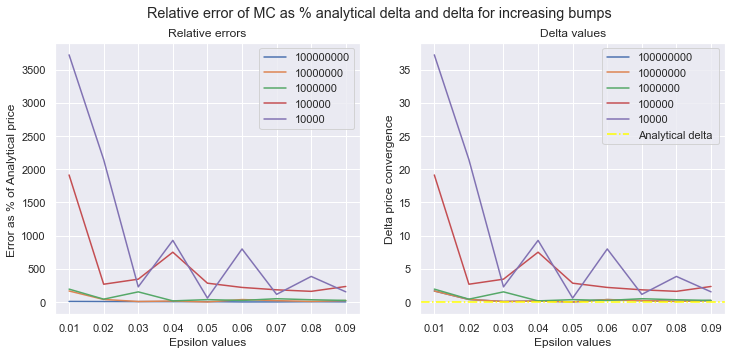

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False, sharex=True)
fig.suptitle("Relative error of MC as % analytical delta and delta for increasing bumps")

axes[0].plot(epsilons[1:],100*rel_err_dig[4],label='100000000')
axes[0].plot(epsilons[1:],100*rel_err_dig[3],label='10000000')
axes[0].plot(epsilons[1:],100*rel_err_dig[2],label='1000000')
axes[0].plot(epsilons[1:],100*rel_err_dig[1],label='100000')
axes[0].plot(epsilons[1:],100*rel_err_dig[0],label='10000')
axes[0].set_title('Relative errors')

axes[1].plot(epsilons[1:],deltasMC_2[3],label='100000000')
axes[1].plot(epsilons[1:],deltasMC_2[3],label='10000000')
axes[1].plot(epsilons[1:],deltasMC_2[2],label='1000000')
axes[1].plot(epsilons[1:],deltasMC_2[1],label='100000')
axes[1].plot(epsilons[1:],deltasMC_2[0],label='10000')
axes[1].axhline(delta_analytical, ls='dashdot', color = 'yellow', label = 'Analytical delta ')
axes[1].set_title('Delta values')
axes[0].legend()
axes[1].legend()
axes[0].set_ylabel('Error as % of Analytical price ')
axes[0].set_xlabel('Epsilon values')
axes[1].set_ylabel('Delta price convergence')
axes[1].set_xlabel('Epsilon values')

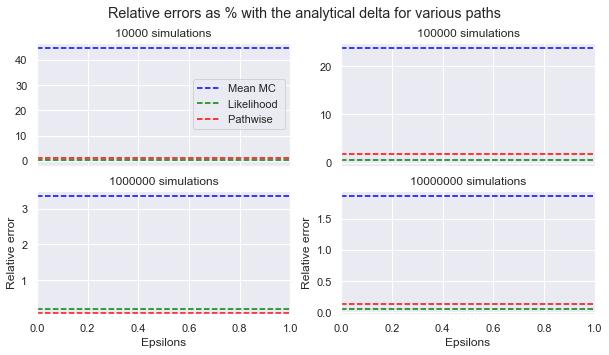

In [100]:
#Plots

fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharey=False, sharex=True)
fig.suptitle("Relative errors as % with the analytical delta for various paths ")
# axes[1,1].plot(epsilons[1:],100*rel_err_dig[3],label='Monte carlo')
axes[1,1].axhline(100*np.mean(rel_err_dig[3]), ls='--', color = 'blue', label = 'Mean MC ')
axes[1,1].axhline(rel_err_likelihood[3], ls='--', color = 'green', label = 'Likelihood ')
axes[1,1].axhline(rel_err_pathwise[3], ls='--', color = 'red', label = 'Pathwise ')
axes[1,1].set_title('10000000 simulations')
# axes[1,0].plot(epsilons[1:],100*rel_err_dig[2],label='Monte carlo')
axes[1,0].axhline(100*np.mean(rel_err_dig[2]), ls='--', color = 'blue', label = 'Mean MC ')
axes[1,0].axhline(rel_err_likelihood[2], ls='--', color = 'green', label = 'Likelihood ')
axes[1,0].axhline(rel_err_pathwise[2], ls='--', color = 'red', label = 'Pathwise ')
axes[1,0].set_title('1000000 simulations')
# axes[0,1].plot(epsilons[1:],100*rel_err_dig[1],label='Monte carlo')
axes[0,1].axhline(100*np.mean(rel_err_dig[1]), ls='--', color = 'blue', label = 'Mean MC ')
axes[0,1].axhline(rel_err_likelihood[1], ls='--', color = 'green', label = 'Likelihood ')
axes[0,1].axhline(rel_err_pathwise[1], ls='--', color = 'red', label = 'Pathwise ')
axes[0,1].set_title('100000 simulations')
# axes[0,0].plot(epsilons[1:],100*rel_err_dig[0],label='Monte carlo')
axes[0,0].axhline(100*np.mean(rel_err_dig[0]), ls='--', color = 'blue', label = 'Mean MC ')
axes[0,0].axhline(rel_err_likelihood[0], ls='--', color = 'green', label = 'Likelihood ')
axes[0,0].axhline(rel_err_pathwise[0], ls='--', color = 'red', label = 'Pathwise ')
axes[0,0].set_title('10000 simulations')
axes[0,0].legend()

for ax in axes[1]:
    ax.set(xlabel='Epsilons', ylabel='Relative error')

In [124]:
means_MC =[np.mean(deltasMC[0:10]), np.mean(deltasMC[10:20]), np.mean(deltasMC[30:40])]
means_MC

[0.010741048735179124, 0.022442760826348836, 0.018285700975886506]

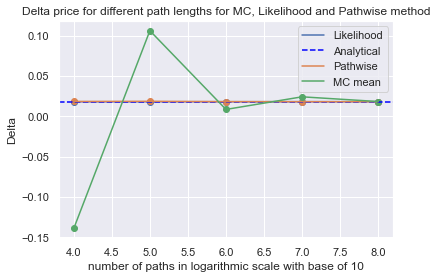

In [86]:
#Plots

means_MC =[np.mean(deltasMC[0:9]), np.mean(deltasMC[9:18]),np.mean(deltasMC[18:27]),np.mean(deltasMC[27:36]), np.mean(deltasMC[36:45])]
# deltasMC2 = np.array([])
#Resize for plot
# for i in range(price_P_MCs.shape[0]):
#     sub_delta = []
#     for j in range(1,price_P_MCs.shape[1]):

#         delta_MC2 = (price_P_MCs[i][j]-price_P_MCs[i][0])/(epsilons[j])
#         sub_delta.append(delta_MC2)
#     # print(sub_delta)
#     mean_delta = np.mean(sub_delta)


#     deltasMC2= np.append(deltasMC2,mean_delta)


# fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False, sharex=True)
# fig.suptitle("Deltas ")
plt.plot([4,5,6,7,8],delta_likelihoods_mean,label='Likelihood')
plt.scatter([4,5,6,7,8],delta_likelihoods_mean)
#
plt.axhline(delta_analytical, ls='--', color = 'blue', label = 'Analytical ')
# # plt.set_title('Likelihood')

plt.plot([4,5,6,7,8],pathwise_mean, label='Pathwise')
plt.scatter([4,5,6,7,8],pathwise_mean)

# # plt.set_title('Pathwise')

plt.plot([4,5,6,7,8],means_MC, label='MC mean')
plt.scatter([4,5,6,7,8],means_MC)
# plt.plot([4,5,6,7],deltasMC2)

plt.title('Delta price for different path lengths for MC, Likelihood and Pathwise method')

plt.xlabel('number of paths in logarithmic scale with base of 10')
plt.ylabel('Delta')
plt.legend()

# for ax in axes.flat:
#     ax.set(xlabel='Paths')

# axes[0].set(ylabel='Relative error')

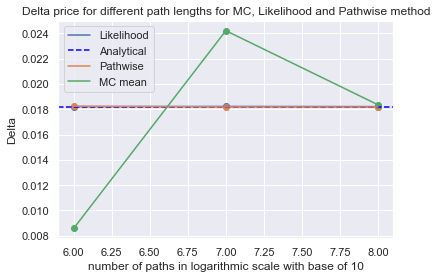

In [89]:
#Plots

means_MC =[np.mean(deltasMC[18:27]),np.mean(deltasMC[27:36]), np.mean(deltasMC[36:45])]
# deltasMC2 = np.array([])
#Resize for plot
# for i in range(price_P_MCs.shape[0]):
#     sub_delta = []
#     for j in range(1,price_P_MCs.shape[1]):

#         delta_MC2 = (price_P_MCs[i][j]-price_P_MCs[i][0])/(epsilons[j])
#         sub_delta.append(delta_MC2)
#     # print(sub_delta)
#     mean_delta = np.mean(sub_delta)


#     deltasMC2= np.append(deltasMC2,mean_delta)


# fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False, sharex=True)
# fig.suptitle("Deltas ")
plt.plot([6,7,8],delta_likelihoods_mean[2:],label='Likelihood')
plt.scatter([6,7,8],delta_likelihoods_mean[2:])
#
plt.axhline(delta_analytical, ls='--', color = 'blue', label = 'Analytical ')
# # plt.set_title('Likelihood')

plt.plot([6,7,8],pathwise_mean[2:], label='Pathwise')
plt.scatter([6,7,8],pathwise_mean[2:])

# # plt.set_title('Pathwise')

plt.plot([6,7,8],means_MC, label='MC mean')
plt.scatter([6,7,8],means_MC)
# plt.plot([4,5,6,7],deltasMC2)

plt.title('Delta price for different path lengths for MC, Likelihood and Pathwise method')

plt.xlabel('number of paths in logarithmic scale with base of 10')
plt.ylabel('Delta')
plt.legend()

#### Likelihood method:

$$ \Delta = \mathbb{E} [e^{-rT} 1_{S_T>K} \frac{Z}{S_0 \sigma \sqrt{T}}] $$

#### Pathwise method:

$$ \Delta =  [e^{-rT} 1_{S_T>K} \frac{S_T}{S_0}] $$

#### Asian analytical price


In [129]:
n=365

sigma_tilde = sigma*np.sqrt( (2*n+1)/(6*n+6) )
r_tilde = 0.5*(r-0.5*sigma**2 + sigma_tilde**2)

d1_tilde = (np.log(stock_price_T0/strike_price) + (r_tilde+0.5*sigma_tilde**2)*T)/(sigma_tilde*np.sqrt(T))
d2_tilde = (np.log(stock_price_T0/strike_price) + (r_tilde-0.5*sigma_tilde**2)*T)/(sigma_tilde*np.sqrt(T))
asian_price = np.exp(-r*T)*(stock_price_T0*np.exp(r_tilde*T)*norm.cdf(d1_tilde) -strike_price*norm.cdf(d2_tilde) )

asian_price

0.11539115389441952 0.0266575591985428 0.2 0.06


6.331828080598059